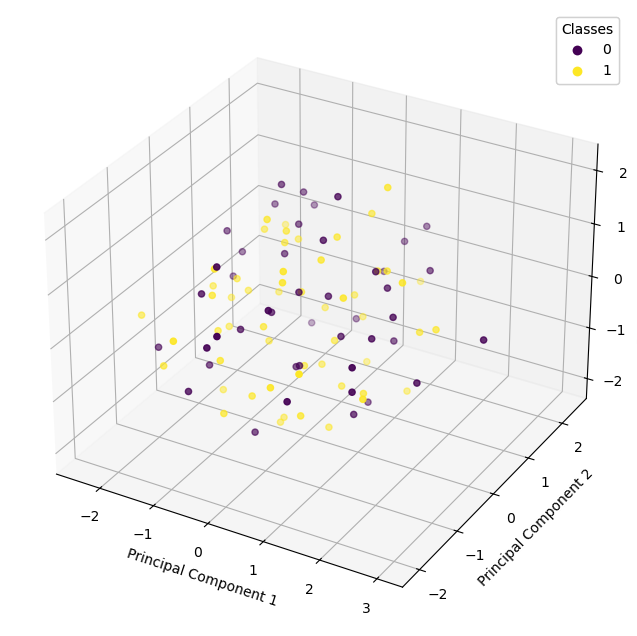

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example DataFrame with synthetic data
data = {
    'A': np.random.rand(100),
    'B': np.random.rand(100) * 0.95 + 0.05,
    'C': np.random.rand(100) * 0.90 + 0.10,
    'D': np.random.rand(100) * 0.85 + 0.15,
    'target': np.random.randint(0, 2, 100)  # Example binary target variable
}

df = pd.DataFrame(data)

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = y

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['target'], cmap='viridis')

# Adding labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Show plot
plt.show()
